# Evaluation Tutorial 

In [47]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split

**Q4** The code will create a synthetic dataset with 50 samples. 


In [48]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=4, n_classes=2, 
                           class_sep = 0.55, random_state=2)

Divide this dataset into 50% train and 50% test and test the performance of a Gaussian Naive Bayes classifier on the data. Repeat this test 10 times and find the mean and standard deviation of the results (code provided). 

In [49]:
gnb = GaussianNB()
X, y = make_classification(n_samples=50, n_features=4, n_classes=2, 
                           class_sep = 0.55, random_state=2)
scores50=[]

# Repeat the test 10 times (different splits)
for rep in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=1/2)
    y_knn = gnb.fit(X_train, y_train).predict(X_test)
    scores50.append(accuracy_score(y_test, y_knn))

In [50]:
arr50  = np.array(scores50)
print('50 samples: Mean Acc. %4.2f, Std %4.3f' % 
      (arr50.mean(), arr50.std()) )

50 samples: Mean Acc. 0.74, Std 0.062


Increase the dataset to 1000 samples (n_samples=1000) and retest. What happens to the mean and standard deviation? What do we learn from this?

In [51]:
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2,
                           class_sep = 0.55, random_state=2)

In [52]:
gnb = GaussianNB()
X, y = make_classification(n_samples=50, n_features=4, n_classes=2,
                           class_sep = 0.55, random_state=2)
scores50=[]

# Repeat the test 10 times (different splits)
for rep in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=1/2)
    y_knn = gnb.fit(X_train, y_train).predict(X_test)    
    scores50.append(accuracy_score(y_test, y_knn))    

In [53]:
arr50  = np.array(scores50)
print('50 samples: Mean Acc. %4.2f, Std %4.3f' %
      (arr50.mean(), arr50.std()) )

50 samples: Mean Acc. 0.72, Std 0.058


---
**Q6**
Using the code in 08 ROC as a template produce ROC curves for kNN, SVM and Naive Bayes classifiers on the diabetes data. 
Repeat this exercise using synthetic data generated using the code below. What insights do these ROC curves provide?  
--- 
Here we use the `roc_curve` and `auc` facilities in scikit learn to plot some AUC curves.  
- For `SVC`, `GaussianNB` and `KNeighborsClassifier` we use the `predict_proba` method to get scores that can be ranked.  

The target is binary but represented as a category variable (`tested_positive`, `tested_negative`).  
We add a column called `target` with 1,0 targets. 

In [54]:
diDF = pd.read_csv('diabetes.csv')
diDF['target'] = np.where(diDF['neg_pos'] == 'tested_positive', 1, 0)
diDF.head()

,preg,plas,pres,skin,insu,mass,pedi,age,neg_pos,target
0,6,148,72,35,0,33.6,0.627,50,tested_positive,1
1,1,85,66,29,0,26.6,0.351,31,tested_negative,0
2,8,183,64,0,0,23.3,0.672,32,tested_positive,1
3,1,89,66,23,94,28.1,0.167,21,tested_negative,0
4,0,137,40,35,168,43.1,2.288,33,tested_positive,1


In [55]:
diDF.pop('neg_pos').values
y = diDF.pop('target').values
Xorig = diDF.values
scaler = StandardScaler()
X = scaler.fit_transform(Xorig)
X.shape, y.shape

((768, 8), (768,))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/3)

In [57]:
gnb = GaussianNB()
y_score = gnb.fit(X_train, y_train).predict_proba(X_test)
fprG, tprG, t = roc_curve(y_test, y_score[:, 1])
roc_aucG = auc(fprG, tprG)
kNN = KNeighborsClassifier(n_neighbors=5, weights='uniform')
yN_score = kNN.fit(X_train, y_train).predict_proba(X_test)
fprN, tprN, t = roc_curve(y_test, yN_score[:, 1])
roc_aucN = auc(fprN, tprN)
yN_score

array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2,

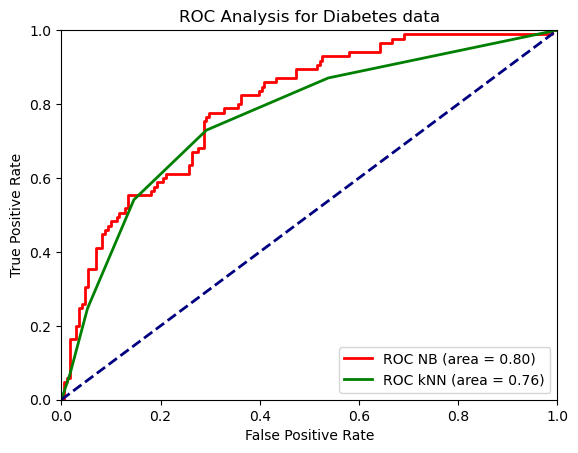

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fprG, tprG, color='red',
         lw=lw, label='ROC NB (area = %0.2f)' % roc_aucG)
plt.plot(fprN, tprN, color='green',
         lw=lw, label='ROC kNN (area = %0.2f)' % roc_aucN)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis for Diabetes data')
plt.legend(loc="lower right")
plt.show()